In [4]:
import h5py

In [42]:
snap = h5py.File('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127/snapshot_127.0.hdf5','r')

In [16]:
def printname(name):
    print (name)
snap.visit(printname)

Config
Header
Parameters
PartType0
PartType0/AllowRefinement
PartType0/Coordinates
PartType0/Density
PartType0/ElectronAbundance
PartType0/EnergyDissipation
PartType0/GFM_AGNRadiation
PartType0/GFM_CoolingRate
PartType0/GFM_Metallicity
PartType0/GFM_Metals
PartType0/GFM_RProcess
PartType0/GFM_WindDMVelDisp
PartType0/GFM_WindHostHaloMass
PartType0/HighResGasMass
PartType0/InternalEnergy
PartType0/Machnumber
PartType0/MagneticField
PartType0/MagneticFieldDivergence
PartType0/Masses
PartType0/NeutralHydrogenAbundance
PartType0/ParticleIDs
PartType0/Potential
PartType0/StarFormationRate
PartType0/Velocities
PartType1
PartType1/Coordinates
PartType1/Masses
PartType1/ParticleIDs
PartType1/Potential
PartType1/Velocities
PartType2
PartType2/Coordinates
PartType2/Masses
PartType2/ParticleIDs
PartType2/Potential
PartType2/Velocities
PartType3
PartType3/Coordinates
PartType3/Masses
PartType3/ParticleIDs
PartType3/Potential
PartType3/Velocities
PartType4
PartType4/BirthDensity
PartType4/BirthPos
P

In [34]:
list(snap.items())

[('Config', <HDF5 group "/Config" (0 members)>),
 ('Header', <HDF5 group "/Header" (0 members)>),
 ('Parameters', <HDF5 group "/Parameters" (0 members)>),
 ('PartType0', <HDF5 group "/PartType0" (23 members)>),
 ('PartType1', <HDF5 group "/PartType1" (5 members)>),
 ('PartType2', <HDF5 group "/PartType2" (5 members)>),
 ('PartType3', <HDF5 group "/PartType3" (5 members)>),
 ('PartType4', <HDF5 group "/PartType4" (15 members)>),
 ('PartType5', <HDF5 group "/PartType5" (31 members)>),
 ('PartType6', <HDF5 group "/PartType6" (2 members)>)]

In [35]:
snap['Header']

<HDF5 group "/Header" (0 members)>

In [37]:
snap.get('Header')

<HDF5 group "/Header" (0 members)>

In [43]:
?h5py.File

Init signature:
h5py.File(
    name,
    mode=None,
    driver=None,
    libver=None,
    userblock_size=None,
    swmr=False,
    rdcc_nslots=None,
    rdcc_nbytes=None,
    rdcc_w0=None,
    track_order=None,
    **kwds,
)
Docstring:      Represents an HDF5 file.
Init docstring:
Create a new file object.

See the h5py user guide for a detailed explanation of the options.

name
    Name of the file on disk, or file-like object.  Note: for files
    created with the 'core' driver, HDF5 still requires this be
    non-empty.
mode
    r        Readonly, file must exist
    r+       Read/write, file must exist
    w        Create file, truncate if exists
    w- or x  Create file, fail if exists
    a        Read/write if exists, create otherwise (default)
driver
    Name of the driver to use.  Legal values are None (default,
    recommended), 'core', 'sec2', 'stdio', 'mpio'.
libver
    Library version bounds.  Currently only the strings 'earliest'
    and 'latest' are defined.
userblock
  

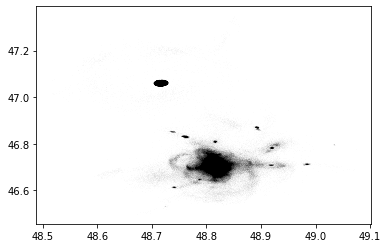

In [19]:
import matplotlib.pyplot as plt 
plt.plot(pos[:,0],pos[:,1],'.k',markersize=0.01)

In [5]:
snap.keys()


<KeysViewHDF5 ['Config', 'Header', 'Parameters', 'PartType0', 'PartType1', 'PartType2', 'PartType3', 'PartType4', 'PartType5', 'PartType6']>

In [6]:
snap['PartType4/Coordinates']

<HDF5 dataset "Coordinates": shape (3811264, 3), type "<f8">

In [10]:
import pynbody

s = pynbody.load('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127/snapshot_127.0.hdf5')

/z/omarioni/miniconda3/lib/python3.7/site-packages/pynbody/snapshot/gadgethdf.py:508: RuntimeWarning: No unit information found!
  warnings.warn("No unit information found!", RuntimeWarning)
/z/omarioni/miniconda3/lib/python3.7/site-packages/pynbody/snapshot/gadgethdf.py:573: RuntimeWarning: No unit information found: using gadget-units.
  "No unit information found: using gadget-units.", RuntimeWarning)


In [11]:
s.all_keys()

['u',
 'p',
 'HII',
 'HeIII',
 'ne',
 'rho_ne',
 'dm',
 'cosmodm',
 'redshift',
 'doppler_redshift',
 'em',
 'halpha',
 'c_n_sq',
 'hetot',
 'hydrogen',
 'HI',
 'HIeos',
 'HID12',
 'HeI',
 'HeII',
 'OI',
 'OII',
 'OVI',
 'CIV',
 'NV',
 'SIV',
 'MGII',
 'feh',
 'sixh',
 'sxh',
 'mgxh',
 'oxh',
 'nexh',
 'cxh',
 'caxh',
 'nxh',
 'ofe',
 'mgfe',
 'nefe',
 'sife',
 'smooth',
 'rho',
 'r',
 'rxy',
 'vr',
 'v2',
 'vt',
 'ke',
 'te',
 'j',
 'j2',
 'jz',
 'vrxy',
 'vcxy',
 'vphi',
 'vtheta',
 'v_mean',
 'v_disp',
 'age',
 'u_mag',
 'u_lum_den',
 'b_mag',
 'b_lum_den',
 'v_mag',
 'v_lum_den',
 'r_mag',
 'r_lum_den',
 'i_mag',
 'i_lum_den',
 'j_mag',
 'j_lum_den',
 'h_mag',
 'h_lum_den',
 'k_mag',
 'k_lum_den',
 'U_mag',
 'U_lum_den',
 'B_mag',
 'B_lum_den',
 'V_mag',
 'V_lum_den',
 'R_mag',
 'R_lum_den',
 'I_mag',
 'I_lum_den',
 'J_mag',
 'J_lum_den',
 'H_mag',
 'H_lum_den',
 'K_mag',
 'K_lum_den',
 'theta',
 'alt',
 'az',
 'cs',
 'mu',
 'p',
 'u',
 'temp',
 'zeldovich_offset',
 'aform',
 'tfor

In [16]:
h=s.halos()

FileNotFoundError: [Errno 2] No such file or directory: '/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/groups_127/subhalo_tab_127.0'

In [7]:
import pynbody
s=pynbody.load('/srv/cosmdatc/clues/B64_WM3_186592/LG/GAS_SFR/4096_Gasoline/0016/WMAP3.CLUES.HR.000016')



Object `subfind.subfind` not found.


In [32]:
import pathlib
import gc
import pandas as pd
import joblib


In [3]:
dir_path = pathlib.Path('/store/clues/HESTIA/RE_SIMS/8192/GAL_FOR/17_11/output_2x2.5Mpc/snapdir_127')

In [38]:
%%time

import h5py
def load(path):
    with h5py.File(path,'r') as snap:
        table = snap['PartType4/Coordinates']
        arr = table[()]
    return {"coordinates": arr, "velocities": }

with joblib.Parallel(n_jobs=1) as P:
    results = P(
        joblib.delayed(load)(path)
        for path in dir_path.glob('*.hdf5'))
    
# results = np.vstack(results)

gc.collect()

CPU times: user 1.13 s, sys: 2.66 s, total: 3.79 s
Wall time: 4.87 s


142

In [41]:
coordinates = np.vstack([r["coordinates"] for r in results])
velc = np.vstack([r["velocities"] for r in results])

In [47]:
np.shape(coordinates)

(29807015, 3)

In [44]:
%matplotlib inline

In [52]:
x = coordinates[:,0]-50
y = coordinates[:,1]-50
z = coordinates[:,2]-50

r = np.sqrt(x**2 + y**2 + z**2)

mask, = np.where(r<5)

(-0.6, -0.5)

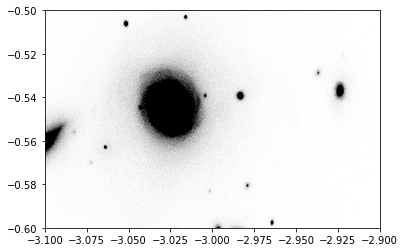

In [62]:
plt.plot(x[mask],y[mask],'.k',markersize=0.005)
plt.xlim(-3.1,-2.9)
plt.ylim(-0.6,-0.5)